# Livrable 2 : Équipe 2
Willy Carlot(Chef de projet), Corentin Le Nozahic, Leo Vauthier, Ilias Tragha
---



# Contexte

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptees à différents types de territoires.

Notre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, Nous avons réalisés plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Nous faisons partie de l’équipe mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer notre activité.


Autrement dit, dans une ère de transition écologie,réduire les émissions de gaz à effet de serre, la congestion urbaine et l'optimisation des ressources liés à la mobilité des personnes et des marchandises sont des defis cruciaux.

Notre structure **CESICDP**, proposons une solution d'optimisation des tournées de véhicules pour minimiser **les** distances parcourues, réduire les coûts logistiques et diminuer l'impact environnemental.

# Objectif

L'objectif de ce projet est de calculer des tournées optimales pour un ou plusieurs véhicules visitant un ensemble de villes avant de retourner au dépot initial, tout en minimisant la distance total.


# Modélisation du problème

Dans l’objectif de limiter les déplacements et la consommation des véhicules, il est nécessaire de modéliser notre problème. Afin de se rapprocher le plus possible de la réalité lors de nos résultats, nous avons choisi de représenter sous la forme d’un graphe $G = (V, E)$ la situation d’une ville connue, **Rouen**, avec :

- $V$ : l’ensemble des **sommets** représentant les intersections de la ville ;
- $E$ : l’ensemble des **arêtes** représentant les routes entre ces intersections.

*Dans le but d'évaluer, prouver et déterminer les limites de notre solution sur des villes plus ou moins denses, avec un grand ou un petit nombre de sommets, nous serons probablement amenés à générer artificiellement des villes*

Sur ce graphe $G$, les intersections sont donc représentées sous forme de sommets, tandis que les routes figureront sous forme d’arêtes.

Dans le cadre de l’amélioration continue, nous avons choisi de prendre en compte deux contraintes :

- **$C1$** : la distance entre les intersections, exprimée par une **pondération** $w : E \rightarrow \mathbb{R}_+$ associée à chaque arête du graphe.De plus, certaines routes peuvent être plus coûteuses ou interdites (par exemple, travaux ou routes bloquées). 

- **$C2$** : la prise en compte d’un **nombre multiple de camions** $n_V$, permettant de faire plusieurs sous-tournées multi-tours plutôt qu’une seule tournée unique.

Ces contraintes ont été choisies car elles sont les plus importantes à prendre en compte vis-a-vis d'une situation réelle. En effet, Les routes barrée et routes avec beaucoup de traffic sont très communes dans les grandes villes. La plupart (voir l'ensemble) des outils de génération d'iténéraires prennent en compte ces contraintes nous avons donc estimés que les $C1$ et $C2$ définies sont les plus intéressentes à mettre en place.

L’objectif de cette etude est de se rapprocher le plus possible d’une **solution viable** ( solution qui s’exécute dans un temps raisonnable ) et **optimisée** ( qui minimise la **somme totale des arêtes parcourues** par l’ensemble des véhicules ), permettant à un ensemble $n_V$ de véhicules de visiter **l’ensemble des points marqués** ( nœuds à desservir ) $M$, tout en revenant au point de départ ( dépot ) $D$.

Dans le cadre de notre étude, nous cherchons un ensemble de sommets :


$TV_0, TV_1, \dots, TV_n$

Décrivant les routes suivies par chaque véhicule, que nous notons globalement $TV$.

Dans le cadre de cett étude nous représentons le problème comme suit :

- $n_v$ : le nombre de véhicules disponibles
- $G = (V, E)$, avec $w : E \rightarrow \mathbb{R}_+$ la fonction de coût associée aux distances
- $D \subseteq V$ : le dépôt (point de départ et d’arrivée de tous les véhicules)
- $M_v \subseteq V$ : l'ensemble des sommets à visiter avec un véhicule pour avoir une solution valide
- $TV_n \subseteq V$, la route du véhicule $n_v \in \{1, ..., n_V\}$, dont la route commence et se termine par son point de départ $D$
- Chaque sommet $M_v \subseteq V \setminus \{D\}$ est visité **exactement une fois** par un unique véhicule (Sauf $D$).
- $k$ est le cardinal de notre graphe

## Fonction objective
Nous cherchons un ensemble de tournées $\{TV_1, ..., TV_{n}\}$ tel que:

- $\sum_{k=1}^{n_v} TV$ contienne l'ensemble des sommets $Mv$

Et que le coût total $w(i, j)$:

- $\sum_{k=1}^{n_v} TV \min \sum_{k=TV_1}^{TV_n} w(i, j)$ soit minimisé.


# Implémentation et exploitation
Une fois le problème modélisé mathématiquement et étude de la complexitée réalisée, nous en avons conclu que notre problème est NP-complet ce qui signifie qu'une instance de solution à notre problème est vérifiable en un temps polynomiale. Le test de l'ensemble des solutions étant trop couteux en temps et en puissance de calcul, il est nécessaire de faire appel à des méta-heuristiques nous permettant de trouver une solution optimale en un temps raisonnable. De nombreuses méta-heurisques existes et notre ploblème est np-complet on peut donc utiliser l'ensemble de méta-heuristiques existantes pour trouver une solution (même si certainement conviennent naturellement plus que d'autres à notre situation). Cependant chaque méta-heurisque va avoir une efficacitée différente en fonction des nombreux facteurs suivants :
- ses paramètres (comme le nombre d’itérations, nombre de véhicule, paramètres intrinsèque à la maté-heuristique, ...),

- les contraintes propres au problème.

- ainsi que les caractéristiques du graphe (nombre de sommets, nombre d’arêtes, pondérations, arêtes bloquées, etc.).


Nous avons donc sélectionnées 3 méta-heuristiques différentes afin de les comparer et en déduire à l'aide d'une etude expérimentale la mata-heuritique la plus proche d'une solution optimal. 

Afin diversifier nos résultats nous avons choisis de sélectionner un algorithme par trajectoire et deux algorithmes par population car notre situation s'y prête plus aisément(les fourmis utilisant cet algorithme pour trouver la route la plus courte jusqu'a la nourriture). Les trois méta-heuristiques retenues sont la recherche avec tabou, l'algorithme génétique et l'algorithme des colonies de fourmis. 

## Modélisation
Avant de pouvoir rechercher le meilleur chemin sur un graphe, il est nécessaire de modéliser notre situation sous forme de graphe.
Pour cela, nous avons utilisé les bibliothèques RandomGraph et MapGraph, qui permettent de générer des graphes selon plusieurs paramètres :
- Nombre de sommets
- Probabilité d'arrêtes
- Probabilité de route couteuse
- Probabilité de route barrée
Ces graph sont des objets networksx et sont affichée avec pyplot.

De plus afin d'avoir des graphes réalistes et de nous permettre de faire une étude complètes sur nos solutions La bibliothèque "MapGraph" nous génère un graph entre des villes du mondes avec des distances réelles(à vol d'oiseau). Tandis que "RandomGraph" nous permet de faire varier les situations afin de pouvoir analyser les résultats de notre algorithmes avec de grandes variations des paramètres.

### Génération d'un graphe
On commence par importer les dépendances et générer une seed :

In [1]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

KeyboardInterrupt: 

Une fois l'ensemble des biblothèques importés nous avons la possibilité de générer un graph aléatoire et de l'afficher 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


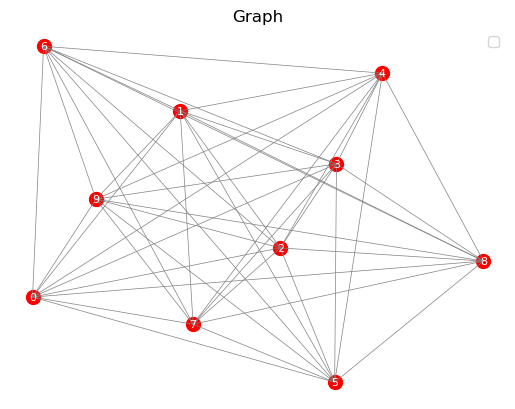

In [ ]:
random_graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
random_graph.plot_graph()

De plus nous pouvons générer un graphe entre différentes villes 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


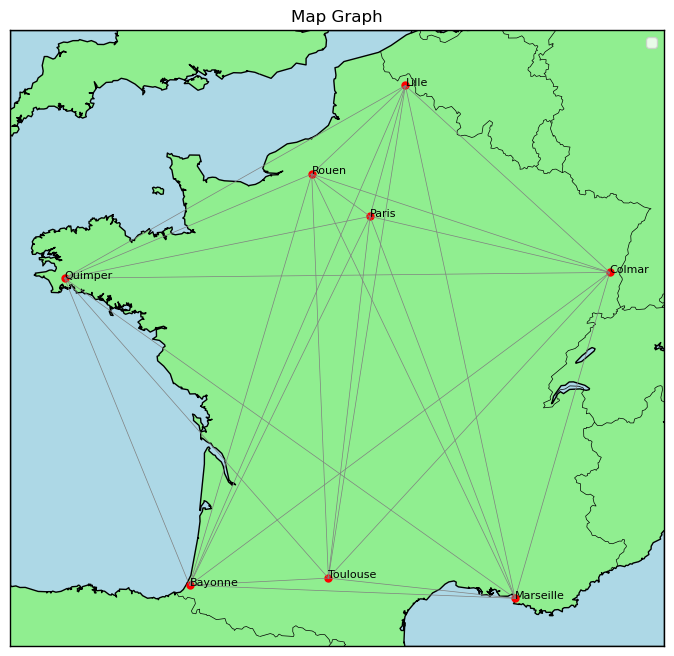

In [ ]:
        
cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]

graph = MapGraph(cities=cities,start_city="Rouen")
graph.plot_graph()


### Filtration

Une fois le graphe généré, nous avons la possibilitée de filtrer ce graphe en y ajoutant une probabilité de route barré ainsi que de route couteuse. Les routes barrés sont représentés en **arêtes rouges fines** tandis que les routes conteuses se distinguent par une **arête rouge épaisse**.


Removed 4 edges of 28
Costed 4 edges of 24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


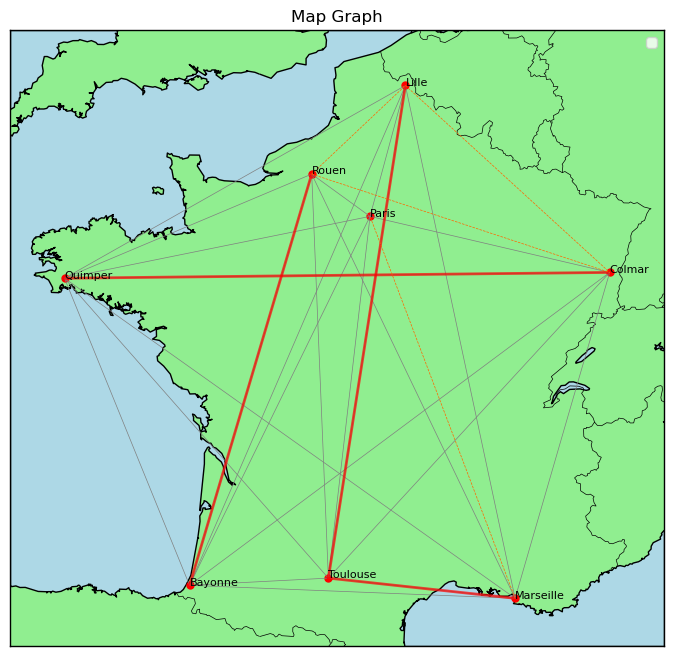

In [ ]:
#Filtration
graph.apply_edge_blocking(percentage=20)
graph.apply_edge_costly(percentage=20)

graph.plot_graph()

## Métaheuristique 1 : Algorithme Tabou
### Modélisation algorithmique  
L'algorithme de par trajectoire de recherche avec tabou fonctionne de la manière suivante:  

#### Génération d'une solution initiale aléatoire
L’algorithme commence par créer une solution de départ, choisie aléatoirement ou via une heuristique simple. Cette solution représente un point de départ dans l’espace de recherche.

#### Génération des voisins
À partir de cette solution initiale, on génère un ensemble de solutions voisines. Ces voisins sont obtenus en effectuant des modifications mineures sur la solution actuelle (par exemple, échanger deux éléments, déplacer un nœud, etc.).

#### Évaluation des voisins et comparaison
On évalue chaque solution voisine en fonction de notre fonction de coût ($\sum_{k=1}^{n_v} TV \min \sum_{k=TV_1}^{TV_n} w(i, j)$ soit minimisé.
). L’algorithme identifie la meilleure solution parmi ces voisins (c’est-à-dire celle avec la distance la plus courte sur la somme des véhicules).

Ensuite, cette solution est comparée à celles enregistrées dans la liste tabou :

Si cette solution n’est pas dans la liste tabou, ou si elle est meilleure que la meilleure solution globale trouvée jusque-là, alors elle est acceptée comme nouvelle solution courante.

Elle est ensuite ajoutée à la liste tabou, pour éviter qu’elle ne soit choisie à nouveau pendant un certain nombre d’itérations.

#### Mise à jour de la liste tabou
La liste tabou fonctionne comme une file à durée limitée : après un certain nombre d’itérations , les anciennes solutions sont retirés pour laisser place aux nouvelles. Cela permet de préserver la diversité des solutions explorées.

#### Répétition sur n itération
Ce processus est répété pendant un nombre fixé d’itérations n. À chaque itération, le but est soit de trouver une meilleure solution, soit d’éviter de rester bloqué dans un minimum local grâce à l’interdiction temporaire de certaines solutions.

#### Retour de la meilleure solution trouvée
Une fois le nombre d’itérations terminé, l’algorithme renvoie la meilleure solution rencontrée au cours de la recherche. Il ne s’agit pas nécessairement de la dernière solution visitée, mais de la meilleure connue (enregistrée dans la liste tabou).



### implémentation python
En python, six paramètres ont été défini pour la classe de notre algorithme :
- size_tabou : Taille de la iste tabou qui permet à l'algorihme d'éviter de prendre des chemins déjà empruntés et de permettre une diversification importante
- num_vehicles : nombre de véhicules 
- min_iterations : nombre minimum d'itération
- max_iterations :nombre maximum d'itération
- convergence_threshold : une fois le nombre minimum d'itération dépassé comptele nombre de fois d'affilé ou l'algorithme ne trouve pas une meilleure solution que la solution précédente (ce paramètre permet avec un nombre itération plus grand que le nombre de solution possible d'arrêter l'éxecution)


In [ ]:
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from utils.plot import Plot
import time  


def time_over_iterations_comparison(graph,algorithms, max_iterations, step = 1, single_plot = True, full_plot = True):
    time_results = {algo.name: [] for algo in algorithms}
    iteration_range = range(1, max_iterations + 1, step)
    for algorithm in algorithms:
        algorithm.convergence_threshold = 0
        for i in iteration_range:
            algorithm.max_iterations = i
            algorithm.min_iterations = i
            algorithm.run()
            time_results[algorithm.name].append(algorithm.execution_time)
            print(f"{algorithm.name} - Iterations: {i} of {max_iterations}, Time: {algorithm.execution_time}s")
        if single_plot:
            single_time_result = {}
            single_time_result[algorithm.name] = time_results[algorithm.name]
            Plot.plot_time_over_iterations_comparison(single_time_result,step)
    if full_plot:
        Plot.plot_time_over_iterations_comparison(time_results,step)

def distance_over_iterations_comparison(graph,algorithms, single_plot = True, full_plot = True, plot_path_single = True, full_path_plot = False):
    algorithms_distance_results = {}
    for algorithm in algorithms:
        algorithm.run()
        algorithms_distance_results[algorithm.name] = algorithm.distance_history
        if single_plot:
            single_distance_results = {}
            single_distance_results[algorithm.name] = algorithm.distance_history
            Plot.plot_distance_over_iterations_comparison(single_distance_results)
    if full_plot:
        Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

# Display results for one algorithm
def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    
# Display results for multiple algorithms

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        start_time = time.time()
        run_algorithm(graph, algorithm)
        end_time = time.time()
        duration = end_time - start_time
        print(f"{algorithm.name} terminé en {duration:.2f} sec.\n")

    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    # graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100




### Etude expérimentale
#### Plan d’expérience
Pour tester l’efficacité de l’algorithme de recherche avec tabou, nous avons défini plusieurs paramètres importants :

- Le nombre de sommets du graphe

- La probabilité de présence d’arêtes

- La probabilité de routes bloquées

- Le nombre d’itérations de l’algorithme

- La taille de la liste tabou

- Le nombre de véhicule

Nous avons généré plusieurs graphes aléatoires en faisant varier ces paramètres, puis lancé l’algorithme sur chacun d’eux pour observer son comportement. Cela nous a permis de tester différentes configurations et d’en mesurer l’impact sur la qualité de la solution trouvée.



#### Etude d'expérience  :
##### Variation du temps en fonction du nombre d'itérations

In [ ]:
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=1, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]



# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

time_over_iterations_comparison(graph= graph,algorithms=algorithms, max_iterations=1000, step=50, single_plot=False)

#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results



Tabu Search - Iterations: 1 of 1000, Time: 0.004004955291748047s
Tabu Search - Iterations: 51 of 1000, Time: 0.3716776371002197s
Tabu Search - Iterations: 101 of 1000, Time: 1.5359961986541748s
Tabu Search - Iterations: 151 of 1000, Time: 3.19649076461792s
Tabu Search - Iterations: 201 of 1000, Time: 5.238966464996338s
Tabu Search - Iterations: 251 of 1000, Time: 9.4054536819458s
Tabu Search - Iterations: 301 of 1000, Time: 13.276128053665161s
Tabu Search - Iterations: 351 of 1000, Time: 19.431347131729126s
Tabu Search - Iterations: 401 of 1000, Time: 23.37515687942505s
Tabu Search - Iterations: 451 of 1000, Time: 32.60531997680664s
Tabu Search - Iterations: 501 of 1000, Time: 42.40124464035034s
Tabu Search - Iterations: 551 of 1000, Time: 262.46264123916626s
Tabu Search - Iterations: 601 of 1000, Time: 110.70232272148132s
Tabu Search - Iterations: 651 of 1000, Time: 93.28900074958801s
Tabu Search - Iterations: 701 of 1000, Time: 122.78207683563232s


En tracant un graphe du temps d'execution en fonction du nombre d'itération on remarque que notre le temps d'exécution est expodentielle par rapport au nombre d'itération. **Nous voulons donc réduire un maximum le nombre d'itération afin de limiter grandement le temps d'exécution**.

# variation du temps en fonction du pourcentage d'arete bloqués

In [ ]:
def time_vs_blocked_edges(graph_generator, algorithm_class, blocked_percentages, max_iterations):
    """
    Affiche la variation du temps d'exécution en fonction du pourcentage d'arêtes bloquées.

    :param graph_generator: une fonction prenant un pourcentage et retournant un graphe avec ce % d’arêtes bloquées.
    :param algorithm_class: une classe d’algorithme (par ex. TabuAlgo).
    :param blocked_percentages: liste de pourcentages d’arêtes bloquées à tester.
    :param max_iterations: nombre d’itérations pour chaque exécution de l’algorithme.
    """
    times = []

    for p in blocked_percentages:
        graph = graph_generator(p)
        algorithm = algorithm_class(graph, max_iterations=max_iterations)
        algorithm.convergence_threshold = 0
        algorithm.run()
        print(f"{algorithm.name} - {p}% d'arêtes bloquées : {algorithm.execution_time:.4f} sec")
        times.append(algorithm.execution_time)

    # Tracer le résultat
    Plot.plot_time_vs_blocked_edges(blocked_percentages, times)

time_vs_blocked_edges(graph= graph,algorithms=algorithms,max_iterations=100, blocked_percentages=20)


# variation du temps en fonction du nombre de sommets

# variation du temps en fonction de la taille de la liste tabou

# variation du temps en fonction de la taille du nombre de véhicule

In [ ]:
# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

run_algorithms(graph= graph,algorithms=algorithms)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


#### Etude de trajectoire
Nous devons vérifier l'évolution de notre meilleur résultat au cours des itérations car 


**Nous avons observé l’évolution du coût de la solution à chaque itération de l’algorithme.
L’étude de trajectoire met en évidence comment l’algorithme s’améliore au fil du temps. Au départ, la solution est aléatoire et peu optimale. Au fur et à mesure des itérations, le mécanisme de recherche dans le voisinage, combiné au filtrage via la liste tabou, permet d’éviter les cycles et d’explorer efficacement l’espace des solutions.
Cette trajectoire montre typiquement une diminution progressive du coût, avec parfois des phases de stagnation ou de rechute dues à l’exploration forcée hors des minima locaux.**


##### Variation de la distance en fonction du nombre d'itération (avec variation taille de graphes)



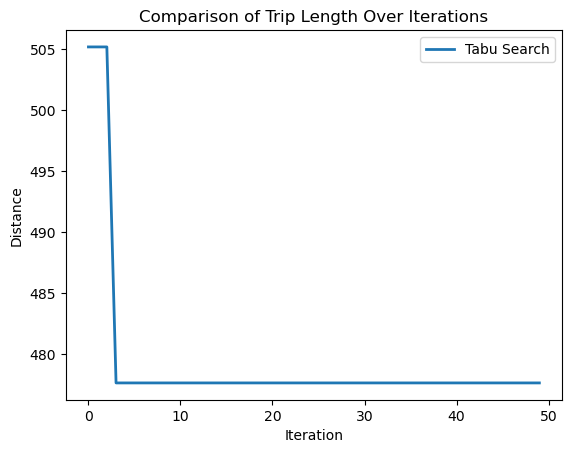

In [ ]:
# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

distance_over_iterations_comparison(graph= graph,algorithms=algorithms, single_plot=False)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


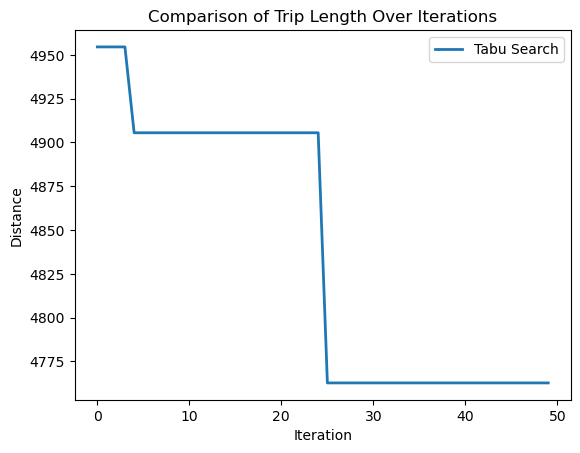

In [ ]:
# Graph generation
graph = RandomGraph(node_number=100,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

distance_over_iterations_comparison(graph= graph,algorithms=algorithms, single_plot=False)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


In [ ]:
def get_iteration_over_node_size(max_node_number = 100, threshold = 20, step = 10):
    if(max_node_number < 6):
        max_node_number=6
    iterations = []
    iteration_range = range(1,max_node_number + 2, step)
    for i in iteration_range:
        graph = RandomGraph(node_number=i,min_weight=1,max_weight=100)
        TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=10)
        TABU.run()
        iterations.append(TABU.total_interations_realized)
        print(f"{i} node step realized on {max_node_number}")
    Plot.plot_iterations_over_node_sizes(iterations)



get_iteration_over_node_size(max_node_number = 100, threshold = 20, step = 10)




NameError: name 'TabuAlgo' is not defined

Avec les graphes de la variation de la distance trouvée par rapport au nombre d'itération on remarque que **plus le nombre de sommets est élevé plus un nombre d'itération est nécessaire pour trouver la solution optimale.**

# Variation de la distance en fonction de la taille du graphe sur de nombreuses itérations

# Variation de la distance (avec petit graphe) en fonction de la taille de la liste tabou



#### Etude statistique
**Pour évaluer la robustesse de l’algorithme, nous avons effectué plusieurs exécutions (par exemple, 30) sur les mêmes graphes avec différents tirages aléatoires.
Nous avons calculé :

La moyenne des coûts obtenus

L’écart-type, indiquant la stabilité de l’algorithme

Le temps d’exécution moyen

Ces résultats nous ont permis de vérifier si l’algorithme est constant, rapide et capable de trouver des solutions proches de l’optimum de manière répétée.**



#### propositions d'améliorations




## Métaheuristique 2 : Algorithme des colonies de fourmis
### Modélisation algorthmique   
L'algorithme des colonies de fourmis fonctionne de la manière suivante :

L’algorithme commence par initialiser les phéromones sur toutes les arêtes du graphe avec une valeur par défaut (1). Chaque fourmi démarre depuis un point de départ représentant le dépôt et construit une solution en visitant les noeds du graphe.

**Construction des solutions**
Chaque fourmi construit une solution en se déplaçant de noeud en noed. Le choix du prochain noeud est basé sur une probabilité calculée à partir des phéromones présentes sur les arêtes et de la distance entre les noeuds. Les noeuds avec plus de phéromones et une distance plus courte ont une probabilité plus élevée d’être choisis.

TODO mettre formule

**Évaluation des solutions**
Une fois que toutes les fourmis ont construit leurs solutions, celles-ci sont évaluées en fonction de la fonction de coût ($\sum_{k=1}^{n_v} TV \min \sum_{k=TV_1}^{TV_n} w(i, j)$ soit minimisé). Les solutions les plus courtes sont considérées comme meilleures.

**Mise à jour des phéromones**
Les phéromones sur les arêtes sont mises à jour de deux manières :

Évaporation : Une partie des phéromones s’évapore pour éviter une convergence prématurée.
Renforcement : Les arêtes utilisées par les meilleures solutions reçoivent un renforcement de phéromones, proportionnel à la qualité de la solution.

**Répétition sur n itérations**
Ce processus est répété pendant un nombre fixé d’itérations n. À chaque itération, les fourmis explorent de nouvelles solutions, et les phéromones sont mises à jour pour guider les prochaines explorations.

**Retour de la meilleure solution trouvée**
Une fois le nombre d’itérations terminé, l’algorithme renvoie la meilleure solution rencontrée au cours de la recherche. Il s’agit de la solution avec le coût total le plus faible.

### implémentation python

Implémentation Python
En Python, plusieurs paramètres ont été définis pour la classe de notre algorithme :

num_ants : Nombre de fourmis utilisées à chaque itération.
decay : Taux d’évaporation des phéromones.
alpha : Influence des phéromones sur le choix des nœuds.
beta : Influence de la distance sur le choix des nœuds.
min_iterations : Nombre minimum d’itérations.
max_iterations : Nombre maximum d’itérations.
convergence_threshold : Nombre d’itérations consécutives sans amélioration avant d’arrêter l’exécution.

TODO dire qu'on a class Ant et ACO, montrer exemple, etc...

### Etude expérimentale

#### Plan d’expérience
variables importantes dans la classe (alpha, beta, decay) dire quels varaibles ont va tester pour voir qui impacte quoi

#### Etude d'experience 
alpha,beta, decay

#### Etude de trajectoire
distance, temps et iterations selon nb de fourmis
montrer var en fonc temps et trajec
#### Etude statistique

#### propositions d'amélioration


In [ ]:
import numpy as np
import random
import pandas as pd
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph

# Paramètres d'exploration
alphas = np.linspace(0.1, 5.0, 10)
betas = np.linspace(0.1, 5.0, 10)
decays = np.linspace(0.1, 1.0, 10)

# Calcul du total d'itérations
total_iterations = len(alphas) * len(betas) * len(decays)
current_iteration = 0

# Stockage des résultats
results = []

# Exploration des combinaisons
def explore_parameters(graph = None):
    generate_graph = (graph == None)
    
    global current_iteration
    for decay in decays:
        for alpha in alphas:
            for beta in betas:
                current_iteration += 1
                if generate_graph:
                    graph = RandomGraph(node_number=15, min_weight=1, max_weight=100)
                graph.apply_edge_blocking(percentage=random.randint(0, 20))
                graph.apply_edge_costly(percentage=random.randint(0, 20))

                aco = AcoAlgo(
                    graph=graph,
                    name="ACO",
                    num_ants=100,
                    num_vehicles=3,
                    decay=decay,
                    alpha=alpha,
                    beta=beta,
                    min_iterations=0,
                    max_iterations=500,
                    convergence_threshold=10,
                )
                aco.run()

                distance = aco.distance
                results.append({
                    "alpha": alpha,
                    "beta": beta,
                    "decay": decay,
                    "distance": distance
                })

def show_best_parameters(top_n=5):
    df = pd.DataFrame(results)
    best = df.sort_values(by="distance").head(top_n)
    print("Meilleurs paramètres trouvés : ")
    print(best[["alpha", "beta", "decay", "distance"]].to_string(index=False))

    best_params = best.iloc[0][["alpha", "beta", "decay"]].to_dict()
    print("Meilleure combinaison : ")
    print(best_params)
explore_parameters()
show_best_parameters()

Meilleurs paramètres trouvés : 
   alpha     beta  decay   distance
5.000000 4.455556    0.5 193.112707
0.644444 2.277778    0.7 216.556927
4.455556 0.644444    1.0 230.510743
2.277778 1.733333    0.5 231.621415
0.100000 3.911111    0.3 233.790118
Meilleure combinaison : 
{'alpha': 5.0, 'beta': 4.455555555555556, 'decay': 0.5}


Nous allons verifier cette solution en réexucutant l'algorithme mais cette fois en ne générant pas de graphe aléatoire à chaque itération, afin de verifier si la solution est semblable

In [ ]:
test_graph = RandomGraph(node_number=15, min_weight=1, max_weight=100)
explore_parameters(test_graph)
show_best_parameters()

Meilleurs paramètres trouvés : 
   alpha     beta  decay   distance
5.000000 4.455556    0.5 193.112707
0.644444 2.277778    0.7 216.556927
4.455556 0.644444    1.0 230.510743
2.277778 1.733333    0.5 231.621415
0.100000 3.911111    0.3 233.790118
Meilleure combinaison : 
{'alpha': 5.0, 'beta': 4.455555555555556, 'decay': 0.5}


La solution est similaire, bien qu'elle pourrait être affinée par une exécution sur des graphes de taille variée, elle permet aux fourmis d'apporter un comportement permettant de minimiser la distance de la solution.

Nous allons donc utiliser :
- $\alpha = 5.0$
- $\beta = 4.45$
- $\rho = 0.5$

Avec ces paramètres, nous pouvons analyser :
- le temps d'execution selon le nombre de fourmis
- la distance obtenu pour un même graphe selon le nombre de fourmis

Num ants: 100, Execution time: 5.3148 seconds
Num ants: 200, Execution time: 10.4766 seconds
Num ants: 300, Execution time: 17.0230 seconds
Num ants: 400, Execution time: 18.9785 seconds
Num ants: 500, Execution time: 21.5845 seconds
Num ants: 600, Execution time: 26.0112 seconds
Num ants: 700, Execution time: 32.8947 seconds
Num ants: 800, Execution time: 34.3336 seconds
Num ants: 900, Execution time: 38.8212 seconds
Num ants: 1000, Execution time: 50.2935 seconds


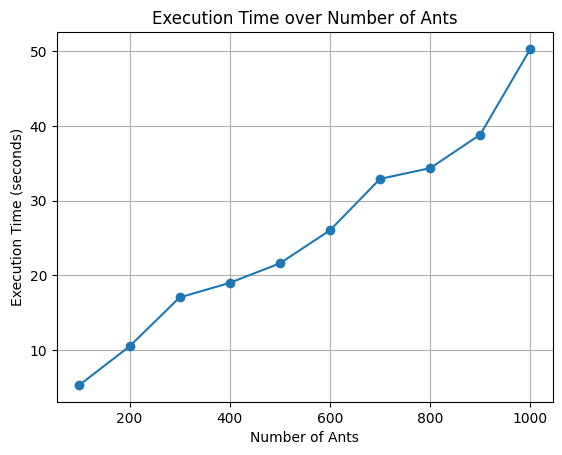

In [3]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

def execution_time_vs_num_ants(graph, num_ants_range, step=20, max_iterations=50):
    execution_times = []
    num_ants_values = range(num_ants_range[0], num_ants_range[1] + 1, step)
    
    for num_ants in num_ants_values:
        algorithm = AcoAlgo(
            graph=graph,
            name="ACO",
            num_ants=num_ants,
            decay=0.5,
            alpha=5.0,
            beta=4.45,
            min_iterations=10,
            max_iterations=max_iterations,
            convergence_threshold=10,
        )
        algorithm.run()
        execution_times.append(algorithm.execution_time)
        print(f"Num ants: {num_ants}, Execution time: {algorithm.execution_time:.4f} seconds")
    
    # Plot the results
    Plot.plot_num_ants_vs_execution_time(num_ants_values, execution_times)

graph = RandomGraph(node_number=50, min_weight=1, max_weight=100)
execution_time_vs_num_ants(graph, num_ants_range=(100, 1000), step=100)


Num ants: 100, Distance: 373.3820
Num ants: 200, Distance: 344.5922
Num ants: 300, Distance: 362.7063
Num ants: 400, Distance: 354.9671
Num ants: 500, Distance: 353.2413
Num ants: 600, Distance: 313.4870
Num ants: 700, Distance: 346.5173
Num ants: 800, Distance: 313.4870
Num ants: 900, Distance: 307.2460
Num ants: 1000, Distance: 331.7767


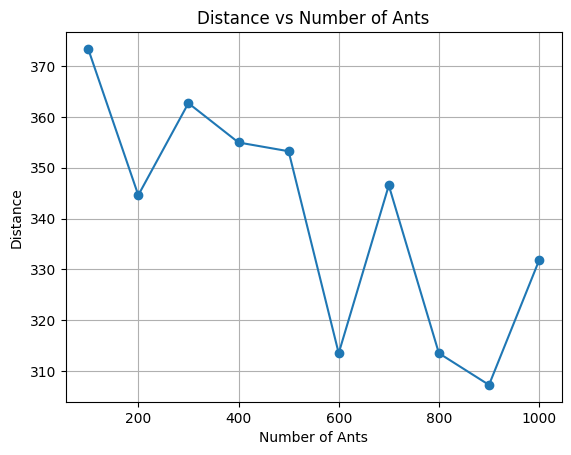

In [1]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

def distance_vs_num_ants(graph, num_ants_range, step=20, max_iterations=50):
    distances = []
    num_ants_values = range(num_ants_range[0], num_ants_range[1] + 1, step)
    
    for num_ants in num_ants_values:
        algorithm = AcoAlgo(
            graph=graph,
            name="ACO",
            num_ants=num_ants,
            decay=0.5,
            alpha=5.0,
            beta=4.45,
            min_iterations=10,
            max_iterations=max_iterations,
            convergence_threshold=10,
        )
        algorithm.run()
        distances.append(algorithm.distance)
        print(f"Num ants: {num_ants}, Distance: {algorithm.distance:.4f}")
    
    # Plot the results
    Plot.plot_num_ants_vs_distance(num_ants_values, distances)

graph = RandomGraph(node_number=50, min_weight=1, max_weight=100)
distance_vs_num_ants(graph, num_ants_range=(100, 1000), step=100)



Sur une même trajectoire de 50 villes à parcourir, le nombre de fourmis à tendance à decroitre la distance totale, mais n'est pas parfaitement linéaire, il n'y a pas un nombre $n$ de fourmis optimal pour chaque type de trajet, nous allons donc réaliser à nouveau notre analyse pour 100, 200 et 500 fourmis, pour differents types de graphes afin de calculer le temps mis et la distance trouvée.

Nodes: 10, Ants: 100, Execution time: 0.5440 seconds
Nodes: 10, Ants: 200, Execution time: 0.9208 seconds
Nodes: 10, Ants: 500, Execution time: 2.2608 seconds
Nodes: 20, Ants: 100, Execution time: 1.0361 seconds
Nodes: 20, Ants: 200, Execution time: 2.3105 seconds
Nodes: 20, Ants: 500, Execution time: 5.9320 seconds
Nodes: 30, Ants: 100, Execution time: 2.2151 seconds
Nodes: 30, Ants: 200, Execution time: 3.7801 seconds
Nodes: 30, Ants: 500, Execution time: 9.4378 seconds
Nodes: 40, Ants: 100, Execution time: 3.1554 seconds
Nodes: 40, Ants: 200, Execution time: 6.7947 seconds
Nodes: 40, Ants: 500, Execution time: 18.7817 seconds
Nodes: 50, Ants: 100, Execution time: 6.7060 seconds
Nodes: 50, Ants: 200, Execution time: 10.6964 seconds
Nodes: 50, Ants: 500, Execution time: 26.2896 seconds
Nodes: 60, Ants: 100, Execution time: 7.2024 seconds
Nodes: 60, Ants: 200, Execution time: 17.8160 seconds
Nodes: 60, Ants: 500, Execution time: 40.1837 seconds
Nodes: 70, Ants: 100, Execution time: 11.

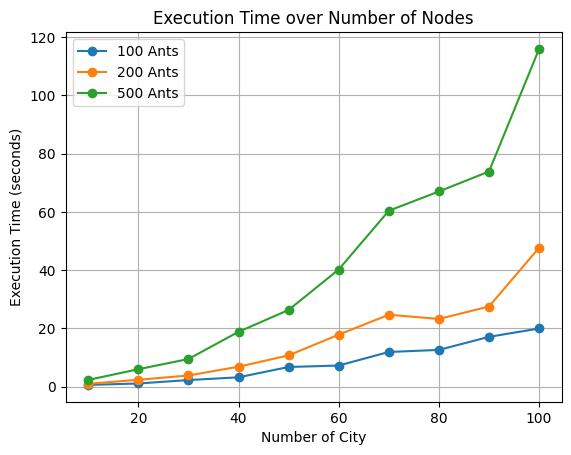

In [3]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

def execution_time_vs_nodes(num_nodes_range, num_ants_list, step=10, max_iterations=50):
    node_counts = range(num_nodes_range[0], num_nodes_range[1] + 1, step)
    results = {num_ants: [] for num_ants in num_ants_list}

    for num_nodes in node_counts:
        graph = RandomGraph(node_number=num_nodes, min_weight=1, max_weight=100)
        for num_ants in num_ants_list:
            algorithm = AcoAlgo(
                graph=graph,
                name=f"ACO_{num_ants}_ants",
                num_ants=num_ants,
                decay=0.5,
                alpha=5.0,
                beta=4.45,
                min_iterations=10,
                max_iterations=max_iterations,
                convergence_threshold=10,
            )
            algorithm.run()
            results[num_ants].append(algorithm.execution_time)
            print(f"Nodes: {num_nodes}, Ants: {num_ants}, Execution time: {algorithm.execution_time:.4f} seconds")

    # Plot the results
    Plot.plot_execution_time_vs_nodes(node_counts, results)

execution_time_vs_nodes(num_nodes_range=(10, 100), num_ants_list=[100, 200, 500], step=10, max_iterations=50)

Nodes: 10, Ants: 100, Distance: 218.2467
Nodes: 10, Ants: 200, Distance: 218.2467
Nodes: 10, Ants: 500, Distance: 218.2467
Nodes: 20, Ants: 100, Distance: 278.3911
Nodes: 20, Ants: 200, Distance: 260.2120
Nodes: 20, Ants: 500, Distance: 274.4515
Nodes: 30, Ants: 100, Distance: 253.5101
Nodes: 30, Ants: 200, Distance: 222.1850
Nodes: 30, Ants: 500, Distance: 253.5101
Nodes: 40, Ants: 100, Distance: 322.7273
Nodes: 40, Ants: 200, Distance: 322.7273
Nodes: 40, Ants: 500, Distance: 322.7273
Nodes: 50, Ants: 100, Distance: 278.4365
Nodes: 50, Ants: 200, Distance: 276.2522
Nodes: 50, Ants: 500, Distance: 275.8251
Nodes: 60, Ants: 100, Distance: 394.4551
Nodes: 60, Ants: 200, Distance: 389.0244
Nodes: 60, Ants: 500, Distance: 389.1045
Nodes: 70, Ants: 100, Distance: 324.7016
Nodes: 70, Ants: 200, Distance: 323.7932
Nodes: 70, Ants: 500, Distance: 326.8172
Nodes: 80, Ants: 100, Distance: 391.7371
Nodes: 80, Ants: 200, Distance: 383.5666
Nodes: 80, Ants: 500, Distance: 365.0786
Nodes: 90, Ants:

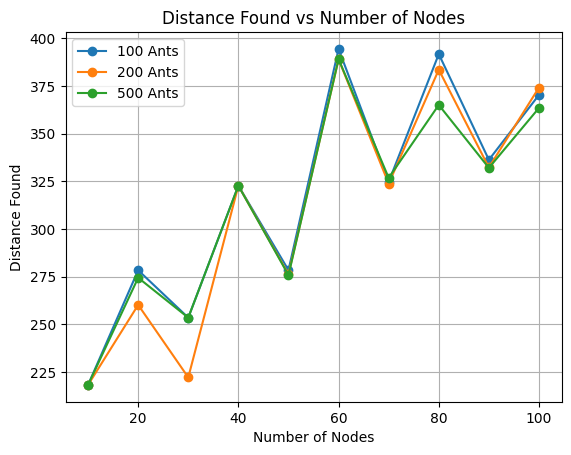

In [1]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

def distance_vs_nodes(num_nodes_range, num_ants_list, step=10, max_iterations=50):
    node_counts = range(num_nodes_range[0], num_nodes_range[1] + 1, step)
    results = {num_ants: [] for num_ants in num_ants_list}

    for num_nodes in node_counts:
        graph = RandomGraph(node_number=num_nodes, min_weight=1, max_weight=100)
        for num_ants in num_ants_list:
            algorithm = AcoAlgo(
                graph=graph,
                name=f"ACO_{num_ants}_ants",
                num_ants=num_ants,
                decay=0.5,
                alpha=5.0,
                beta=4.45,
                min_iterations=10,
                max_iterations=max_iterations,
                convergence_threshold=10,
            )
            algorithm.run()
            results[num_ants].append(algorithm.distance)
            print(f"Nodes: {num_nodes}, Ants: {num_ants}, Distance: {algorithm.distance:.4f}")

    # Plot the results
    Plot.plot_distance_vs_nodes(node_counts, results)

# Example usage
distance_vs_nodes(num_nodes_range=(10, 100), num_ants_list=[100, 200, 500], step=10, max_iterations=50)

Soit assez similaire mais pour grand trajet 6x + rapide pour 100


## Métaheuristique 3 : Algorithme génétique
### Modélisation algorthmique   
### implémentation python

### Etude expérimentale

#### Plan d’expérience

#### Etude de trajectoire

#### Etude statistique

#### propositions d'amélioration


## Conclusion

# Bibliographie
* [TSP wiki](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce)
* [(TSP) exemple](https://docs.mosek.com/latest/dotnetfusion/case-studies-tsp.html)
* [VRP](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_tourn%C3%A9es_de_v%C3%A9hicules)

* [Réductions polynomiales](https://datamove.imag.fr/denis.trystram/SupportsDeCours/lesson4reductions.pdf)

* [Les 21 problèmes NP-complets de Karp](https://fr.wikipedia.org/wiki/21_probl%C3%A8mes_NP-complets_de_Karp)

* [The Complexity of Theorem-Proving Procedures](https://www.inf.unibz.it/~calvanese/teaching/14-15-tc/material/cook-1971-NP-completeness-of-SAT.pdf)

* [REDUCIBILITY AMONG COMBINATORIAL PROBLEM](https://cgi.di.uoa.gr/~sgk/teaching/grad/handouts/karp.pdf)

